In [57]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import normalize,scale
import matplotlib.pyplot as plt
%matplotlib inline 

# Logistic Regression using Sklearn package 

In [262]:
Iris = datasets.load_iris() # Iris dataset 
Iris_Data = Iris.data       # extract Iris data
Iris_Target = Iris.target   # extract Iris targets

data = Iris_Data[:100,:]     # Extract 2 class data instead of the 3 class
target = Iris_Target[:100]   # Extract 2 class target instead of the 3 class

normalized_data = normalize(data, norm = 'l2') #Normalize the data
standarized_data = scale(data) #Standarize the data

lr = LogisticRegression()        # Initialize the logistic regression model 
lr.fit(standarized_data,target)  # train the model

predictedLabels = lr.predict(standarized_data) # test the model on the training data
# print a report about classification performance 
print (metrics.classification_report(target,predictedLabels)) 
# Print confusion matrix 
print (metrics.confusion_matrix(target,predictedLabels))
print 'Coefficients: {v}\n'.format(v = lr.coef_) # Print weights 
print 'Bias: {v} \n'.format(v = lr.intercept_)   # print bias

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       100

[[50  0]
 [ 0 50]]
Coefficients: [[ 0.81091424 -1.16601465  1.52533197  1.5428075 ]]

Bias: [ 0.10503024] 



# Activation Functions 

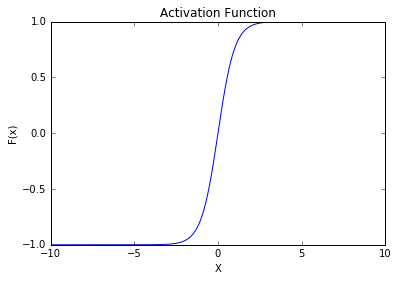

In [268]:
class ActivationFunctions (object):
    """
    This class generates different well-knwon activation functions
    x : is the data to apply the activation function on it.
    Defaukt value is np.linspace(-10,10,1000)
    """
    
    def __init__ (self):
        pass
    
    def Sigmoid(self,x):
        self.y = 1.0 / (1+np.exp(-x))
        return self.y
    
    def ReLU(self,x):
        self.y = np.maximum(0,x)
        return self.y
    
    def Tanh(self,x):
        self.y = np.tanh(x)
        return self.y
    
    def UnitStep(self,x):
        self.y = np.where(x>=0 , 1,0)
        return self.y
    
    def DrawActivationFunction (self,x):
        plt.plot(x,self.y)
        plt.title ('Activation Function')
        plt.xlabel('X')
        plt.ylabel('F(x)')
        
    
activationFn = ActivationFunctions()
y = activationFn.Tanh(np.linspace(-10,10,1000))
activationFn.DrawActivationFunction(np.linspace(-10,10,1000))

# Cost Functions

In [342]:
class CostFunctions (object):
    
    def __init__ (self):
        pass
    
    def NLL (self,yPredicted,target,data):
        cost = (1./target.shape[0]) * (-target.T.dot(np.log(yPredicted)) - (1-target).T.dot(np.log(1-yPredicted)))
        grad = (1./target.shape[0]) * np.dot((target - yPredicted),data)
        return cost, grad  
    
    def MSE (self,yPredicted,target,data):
        cost =  0.5 * sum(np.sqrt(np.power(slef.target - yPredicted),2))
        grad =  np.dot((self.target - yPredicted),self.data)
        return cost, grad  
    
    def CrossEntropy(self,yPredicted,target,data):
        pass
    
    def softmax(self,yPredicted,target,data):
        return np.exp(yPredicted) / np.sum(np.exp(yPredicted))
    

# Weight Update Rules

In [397]:
class WeightUpdateRules (object):
    
    def __init__ (self,data=[],target=[],weights=[],batchSize=1,eta=0.01,epochs = 100):
        self.target = target  
        self.data = data
        self.weights = weights
        self.batchSize = batchSize
        self.eta = eta
        self.epochs = epochs
        self.costError = []
        self.activationFn = ActivationFunctions()
        self.costFn = CostFunctions()
        
    def GD (self):
        for i in np.arange(self.epochs):
            z = self.NetInput(self.data,self.weights)
            yPredicted = self.activationFn.Sigmoid(z)
            cost,grad = self.costFn.NLL(yPredicted,self.target,self.data)
            self.weights += self.eta*grad
            self.costError.append(cost) 
            print 'Epoch # {e:3d} , Error = {v:4.4f} \n'.format(e=i+1,v=cost)
            
            
    def SGD (self):
        for i in np.arange(self.epochs):
            costErr = 0
            for record, label in zip(self.data, self.target):
                z = self.NetInput(record,self.weights)
                yPredicted = self.activationFn.Sigmoid(z)
                cost,grad = self.costFn.NLL(yPredicted,label,record)
                costErr += cost
                self.weights += self.eta*grad
                
            self.costError.append(costErr)
            print 'Epoch # {e:3d} , Error = {v:4.4f} \n'.format(e=i+1,v=costErr)
    
    def BatchSGD (self):
        batchCerator = self.iter_minibatches()
        for i in np.arange(self.epochs):
            costErr = 0
            for batch,label in batchCerator:
                z = self.NetInput(batch,self.weights)
                yPredicted = self.activationFn.Sigmoid(z)
                cost,grad = self.costFn.NLL(yPredicted,label,batch)
                costErr += cost
                self.weights += self.eta*grad
                
            self.costError.append(costErr)
            print 'Epoch # {e:3d} , Error = {v:4.4f} \n'.format(e=i+1,v=costErr)
    
    def NetInput (self,x,w):
        return np.dot(x,w)
    
    def iter_minibatches(self):
    # Provide chunks one by one
        chunkstartmarker = 0
        while chunkstartmarker < self.data.shape[0]:
            chunkrows = range(chunkstartmarker,chunkstartmarker+self.batchSize)
            X_chunk, y_chunk = self.data[chunkrows,:], self.target[chunkrows]
            yield X_chunk, y_chunk
            chunkstartmarker += self.batchSize

# Logistic Regression using plain python

In [398]:
class LogisticRegression2 (object):
    
    def __init__(self, eta=0.01, epochs=150):
        self.eta = eta
        self.epochs = epochs
        self.activationFn = ActivationFunctions()
        
    def fit (self,data, target):
        self.w = np.zeros(data.shape[1])
        updateRule = WeightUpdateRules(data=data,target=target,weights=self.w,eta=self.eta,epochs = self.epochs)
        updateRule.GD()
        self.cost = updateRule.costError
        self.w = updateRule.weights
        
    def predict (self,x,w):
        yPredicted = self.activationFn.Sigmoid(self.NetInput(x,w))
        return np.where (yPredicted>0.5,1,0)
        
    def NetInput (self,x,w):
        
        return np.dot(x,w)
    
    def PlotCostError(self):
        plt.plot(range(1, len(self.cost) + 1), self.cost)

# Test LogisticRegression2

Epoch #   1 , Error = 0.6931 

Epoch #   2 , Error = 0.6243 

Epoch #   3 , Error = 0.5655 

Epoch #   4 , Error = 0.5150 

Epoch #   5 , Error = 0.4716 

Epoch #   6 , Error = 0.4341 

Epoch #   7 , Error = 0.4015 

Epoch #   8 , Error = 0.3730 

Epoch #   9 , Error = 0.3480 

Epoch #  10 , Error = 0.3259 

Epoch #  11 , Error = 0.3062 

Epoch #  12 , Error = 0.2887 

Epoch #  13 , Error = 0.2729 

Epoch #  14 , Error = 0.2588 

Epoch #  15 , Error = 0.2459 

Epoch #  16 , Error = 0.2343 

Epoch #  17 , Error = 0.2237 

Epoch #  18 , Error = 0.2139 

Epoch #  19 , Error = 0.2050 

Epoch #  20 , Error = 0.1968 

Epoch #  21 , Error = 0.1892 

Epoch #  22 , Error = 0.1821 

Epoch #  23 , Error = 0.1756 

Epoch #  24 , Error = 0.1695 

Epoch #  25 , Error = 0.1638 

Epoch #  26 , Error = 0.1585 

Epoch #  27 , Error = 0.1536 

Epoch #  28 , Error = 0.1489 

Epoch #  29 , Error = 0.1445 

Epoch #  30 , Error = 0.1404 

Epoch #  31 , Error = 0.1365 

Epoch #  32 , Error = 0.1328 

Epoch # 

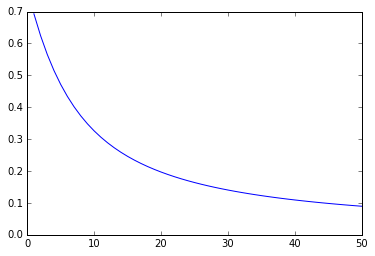

In [400]:
Iris = datasets.load_iris() # Iris dataset 
Iris_Data = Iris.data       # extract Iris data
Iris_Target = Iris.target   # extract Iris targets

data = Iris_Data[:100,:]     # Extract 2 class data instead of the 3 class
target = Iris_Target[:100]   # Extract 2 class target instead of the 3 class

normalized_data = normalize(data, norm = 'l2') #Normalize the data
standarized_data = scale(data) #Standarize the data
temp = np.ones_like(target)           # create vector of ones 
temp.shape = (target.shape[0],1)      # change the shape of the vector 
data = np.hstack((temp,standarized_data)) 
lr = LogisticRegression2(eta = 0.1, epochs=50)
lr.fit(data = data,target = target)
yPredicted = lr.predict(data,lr.w)

lr.PlotCostError()

# print a report about classification performance 
print (metrics.classification_report(target,yPredicted)) 
# Print confusion matrix 
print (metrics.confusion_matrix(target,yPredicted))
print 'Coefficients: {v}\n'.format(v = lr.w[1:]) # Print weights 
print 'Bias: {v} \n'.format(v = lr.w[0])   # print bias